# Fitting curve to data
Within this notebook we do some data analytics on historical data to feed some real numbers into the model. Since we assume the consumer data to be resemble a sinus, due to the fact that demand is seasonal, we will focus on fitting data to this kind of curve.

In [19]:
import pandas as pd
import numpy as np
from scipy.optimize import leastsq
import pylab as plt
import time

# print the time of last run
print('last run of this notebook:')
time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime())

last run of this notebook:


'Mon, 13 Nov 2017 13:14:36'

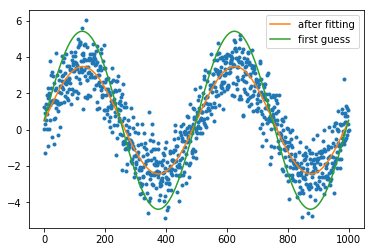

In [20]:
# test function
N = 1000 # number of data points
t = np.linspace(0, 4*np.pi, N)
data = 3.0*np.sin(t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)
guess_phase = 0

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(t+x[1]) + x[2] - data
est_std, est_phase, est_mean = leastsq(optimize_func, [guess_std, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_std*np.sin(t+est_phase) + est_mean

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()

## import data for our model
This is data imported from statline CBS webportal.

In [2]:
importfile = 'CBS Statline Gas Usage.xlsx'
df = pd.read_excel(importfile, sheetname='Month', skiprows=1)
df.drop(['Onderwerpen_1', 'Onderwerpen_2', 'Perioden'], axis=1, inplace=True)

#df

In [3]:
# transpose
df = df.transpose()


In [4]:
# provide headers
new_header = df.iloc[0]
df = df[1:]
df.rename(columns = new_header, inplace=True)

In [5]:
#df.drop(['nan'], axis=0, inplace=True)
df


,Totaal verbruik,Totaal via het hoofdtransportnet,Elektriciteitscentrales,Overige verbruikers,Via regionale netten,Verbruik bij de winning,nan,nan,nan
2010 januari,6917,2638,1066,1572,4218,61,NaN,NaN,14.6447
2010 februari,5834,2290,941,1349,3490,54,NaN,NaN,13.9474
2010 maart,5075,2381,965,1416,2636,58,NaN,NaN,11.9317
2010 april,3724,2056,841,1215,1614,54,NaN,NaN,13.5475
2010 mei,3538,2027,742,1285,1458,53,NaN,NaN,16.8825
2010 juni,2658,1844,673,1171,763,51,NaN,NaN,19.275
2010 juli,2581,1927,698,1229,603,51,NaN,NaN,19.4976
2010 augustus,2599,1837,668,1169,709,53,NaN,NaN,18.1886
2010 september,3024,1936,729,1207,1042,46,NaN,NaN,18.981
2010 oktober,4147,2345,983,1362,1742,60,NaN,NaN,18.5762


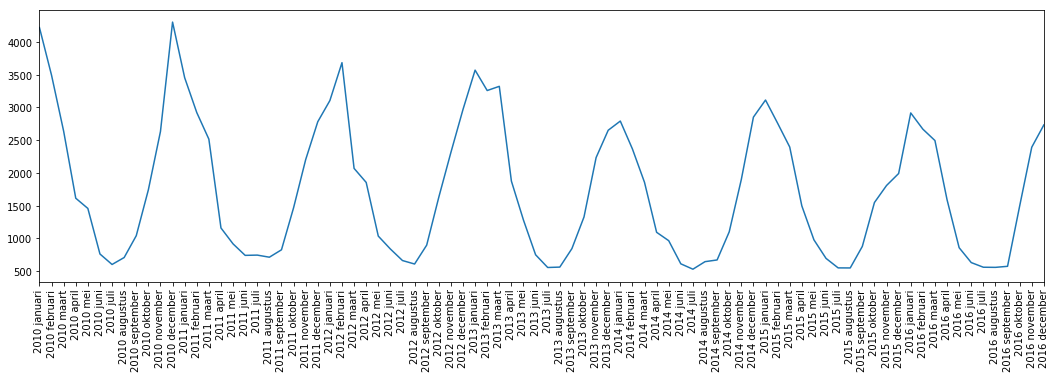

In [6]:
x = range(len(df.index))
df['Via regionale netten'].plot(figsize=(18,5))
plt.xticks(x, df.index, rotation='vertical')
plt.show()


## now let fit different consumer groups

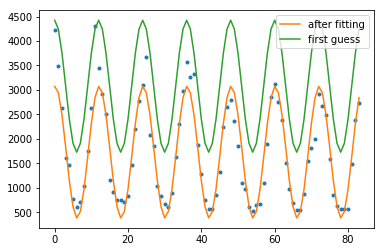

Via regionale netten
max_demand: 2695.90755293
phase_shift: -0.0749085918325
base_demand: 380.296224651


In [7]:
#b = self.base_demand
#m = self.max_demand
#y = b + m * (.5 * (1 + np.cos((x/6)*np.pi)))
#b = 603
#m = 3615

N = 84 # number of data points
t = np.linspace(0, 83, N)
#data = b + m*(.5 * (1 + np.cos((t/6)*np.pi))) + 100*np.random.randn(N) # create artificial data with noise
data = np.array(df['Via regionale netten'].values, dtype=np.float64)

guess_mean = np.mean(data)
guess_std = 2695.9075546 #2*np.std(data)/(2**0.5)
guess_phase = 0

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_mean + guess_std*(.5 * (1 + np.cos((t/6)*np.pi + guess_phase)))

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*(.5 * (1 + np.cos((t/6)*np.pi+x[1]))) + x[2] - data
est_std, est_phase, est_mean = leastsq(optimize_func, [guess_std, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_mean + est_std*(.5 * (1 + np.cos((t/6)*np.pi + est_phase)))

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()
print('Via regionale netten')
print('max_demand: %s' %(est_std))
print('phase_shift: %s' %(est_phase))
print('base_demand: %s' %(est_mean))

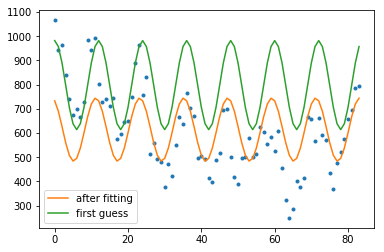

Elektriciteitscentrales
max_demand: 261.178751524
phase_shift: 0.423813583566
base_demand: 483.327290904


In [8]:
#data = b + m*(.5 * (1 + np.cos((t/6)*np.pi))) + 100*np.random.randn(N) # create artificial data with noise
data = np.array(df['Elektriciteitscentrales'].values, dtype=np.float64)

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)
guess_phase = 0

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_mean + guess_std*(.5 * (1 + np.cos((t/6)*np.pi + guess_phase)))

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*(.5 * (1 + np.cos((t/6)*np.pi+x[1]))) + x[2] - data
est_std, est_phase, est_mean = leastsq(optimize_func, [guess_std, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_mean + est_std*(.5 * (1 + np.cos((t/6)*np.pi + est_phase)))

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()
print('Elektriciteitscentrales')
print('max_demand: %s' %(est_std))
print('phase_shift: %s' %(est_phase))
print('base_demand: %s' %(est_mean))

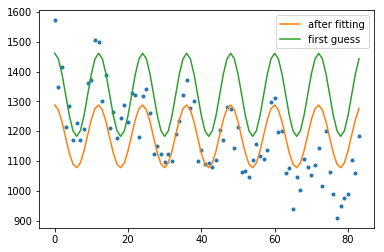

Overige verbruikers
max_demand: 210.422418112
phase_shift: 0.0416396205406
base_demand: 1077.34831476


In [9]:
#data = b + m*(.5 * (1 + np.cos((t/6)*np.pi))) + 100*np.random.randn(N) # create artificial data with noise
data = np.array(df['Overige verbruikers'].values, dtype=np.float64)

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)
guess_phase = 0
guess_saving = .997

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = (guess_mean + guess_std*(.5 * (1 + np.cos((t/6)*np.pi + guess_phase)))) #* np.power(guess_saving,t)

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*(.5 * (1 + np.cos((t/6)*np.pi+x[1]))) + x[2] - data
est_std, est_phase, est_mean = leastsq(optimize_func, [guess_std, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_mean + est_std*(.5 * (1 + np.cos((t/6)*np.pi + est_phase)))

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()
print('Overige verbruikers')
print('max_demand: %s' %(est_std))
print('phase_shift: %s' %(est_phase))
print('base_demand: %s' %(est_mean))

# price forming
In order to estimate willingness to sell en willingness to buy we look at historical data over the past view years. We look at the DayAhead market at the TTF. Altough this data does not reflect real consumption necessarily

In [10]:

inputexcel = 'TTFDA.xlsx'
outputexcel = 'pythonoutput.xlsx'

price = pd.read_excel(inputexcel, sheetname='Sheet1', index_col=0)
quantity = pd.read_excel(inputexcel, sheetname='Sheet2', index_col=0)

price.index = pd.to_datetime(price.index, format="%d-%m-%y")
quantity.index = pd.to_datetime(quantity.index, format="%d-%m-%y")

pq = pd.concat([price, quantity], axis=1, join_axes=[price.index])
pqna = pq.dropna()

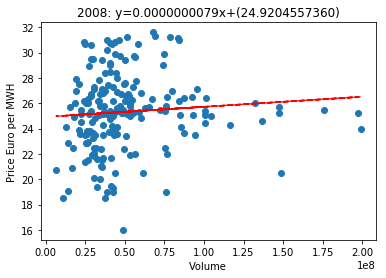

y=0.0000000079x+(24.9204557360)


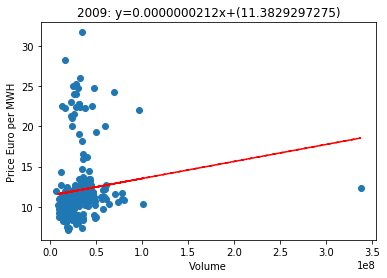

y=0.0000000212x+(11.3829297275)


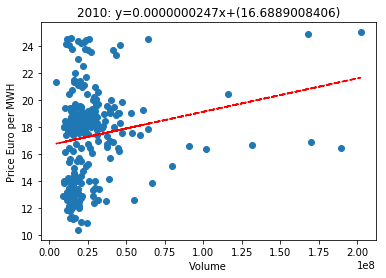

y=0.0000000247x+(16.6889008406)


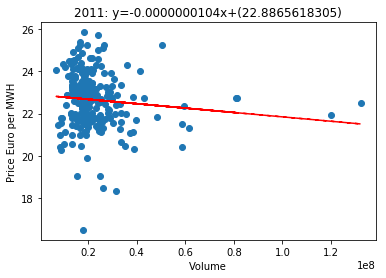

y=-0.0000000104x+(22.8865618305)


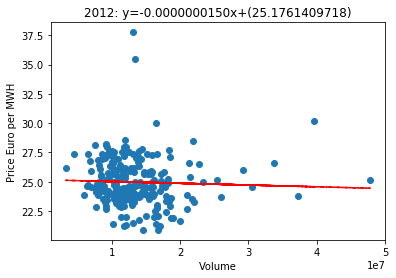

y=-0.0000000150x+(25.1761409718)


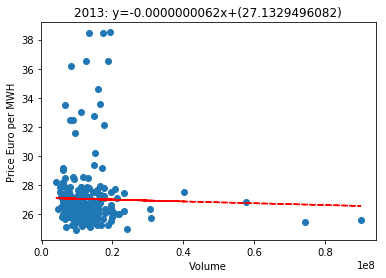

y=-0.0000000062x+(27.1329496082)


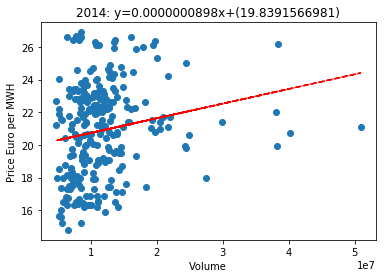

y=0.0000000898x+(19.8391566981)


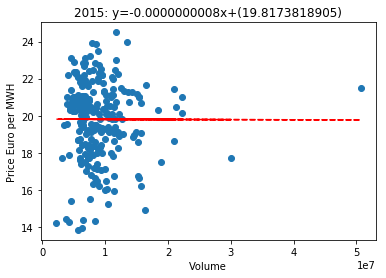

y=-0.0000000008x+(19.8173818905)


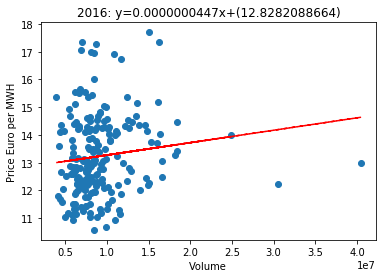

y=0.0000000447x+(12.8282088664)


In [23]:
year = np.arange(2008,2017,1)

coefficientyear = []

for i in year:
    x= pqna['Volume'].sort_index().loc["%s"%i]
    y= pqna['Last'].sort_index().loc["%s"%i]
    #plot the trendline
    plt.plot(x,y,'o')
    # calc the trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--", label="%s"%i)
    plt.xlabel("Volume")
    plt.ylabel("Price Euro per MWH")
    plt.title('%s: y=%.10fx+(%.10f)'%(i,z[0],z[1]))
    # plt.savefig('%s.png' %i)
    plt.show()
    # the line equation:
    print("y=%.10fx+(%.10f)"%(z[0],z[1]))
    # save the variables in a list
    coefficientyear.append([i, z[0], z[1]])

In [12]:
len(year)

9

In [28]:
init_buyer = {'elec_eu':{'b':400, 'm' : 673, 'lb_price': 10, 'ub_price' : 20, 'type' : 2, 'market' : ['eu']},
              'indu_eu':{'b':400, 'm':1171, 'lb_price': 10, 'ub_price' : 20, 'type' : 3, 'market' : ['eu']},
              'home_eu':{'b': 603, 'm': 3615, 'lb_price': 10, 'ub_price' : 20, 'type' : 1, 'market' : ['eu']},
              'elec_us':{'b':400, 'm' : 673, 'lb_price': 10, 'ub_price' : 20, 'type' : 2, 'market' : ['us']},
              'indu_us':{'b':400, 'm':1171, 'lb_price': 10, 'ub_price' : 20, 'type' : 3, 'market' : ['us']},
              'elec_as':{'b':400, 'm' : 673, 'lb_price': 10, 'ub_price' : 20, 'type' : 2, 'market' : ['as']},
              'indu_as':{'b':400, 'm':1171, 'lb_price': 10, 'ub_price' : 20, 'type' : 3, 'market' : ['as']}}

for i in init_buyer: 
    if i!= 'indu_as':
        print(i)
print('indu_as')

elec_us
elec_eu
indu_eu
elec_as
home_eu
indu_us
indu_as
